### Data Transformation

1. Feature Encoding
2. Data splitting
3. Outliers detection and treatment
4. Correlation and Multicollinearity checks


* Input : Cleaned dataset from Notebook1 (inpt_df_processed.csv)
* Outcome : Encoded and outlier fixed datasets - x_train_outfix.csv, x_test_outfix.csv, y_train_c3.csv and y_test_c3.csv

In [12]:
# Import libraries
import pandas as pd
import numpy as np

# Import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import preprocessing methods
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.model_selection import train_test_split

In [13]:
inpt_df=pd.read_csv('inpt_df_processed.csv')
inpt_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### 1. Feature Encoding

In [14]:
#--------------------------------------------------------------
#1. One Hot Encoding of Categorical variables
#--------------------------------------------------------------

def onehot_encode(df):
    onehotlabels = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, 
                                  columns=["SEX","EDUCATION","MARRIAGE"], sparse=False,drop_first=False, dtype=None)
    return onehotlabels

inpt_df = onehot_encode(inpt_df)
inpt_df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,DEFAULT,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,0,0,0,0,3913,3102,...,1,0,1,0,1,0,0,1,0,0
1,120000,26,0,2,0,0,0,2,2682,1725,...,1,0,1,0,1,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,1,0,1,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,1,0,1,0,0,1,0,0
4,50000,57,0,0,0,0,0,0,8617,5670,...,0,1,0,0,1,0,0,1,0,0


#### 2. Train Test splitting

In [17]:
# separate train and test sets in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(inpt_df, inpt_df['DEFAULT'],test_size=0.3,random_state=0)

x_train = x_train.drop(['DEFAULT'], axis=1)
x_test = x_test.drop(['DEFAULT'], axis=1)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
x_train.head()

(21000, 29) (21000,) (9000, 29) (9000,)


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
15925,30000,31,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10062,200000,31,1,2,2,0,0,0,29070,31302,...,2000,1,0,0,1,0,0,1,0,0
19376,500000,38,0,0,0,0,0,0,2252,2265,...,3532,0,1,0,0,0,1,0,1,0
6384,20000,22,0,0,0,0,0,0,17807,18520,...,775,0,1,0,1,0,0,0,1,0
15976,50000,48,1,2,0,0,0,0,18704,18106,...,1000,0,1,0,1,0,0,1,0,0


#### 3. Outlier detection and treatment

In [18]:
#--------------------------------------------------------------
#1 Outliers detection
#--------------------------------------------------------------

# windsorization (Top coding method): From EDA plots it is evident that all outliers lie all at the right side of 
#                                    the distribution. Hence this method is considered for outlier detection and treatment.

def outliers_iqr(dt):
    iqr = dt.quantile(0.75) - dt.quantile(0.25)
    upper_bound = dt.quantile(0.75) + (iqr * 3)
    lower_bound = dt.quantile(0.25) - (iqr * 3)
    return (dt.loc[(dt > upper_bound)].count(),dt.loc[(dt < lower_bound)].count(),upper_bound)

In [25]:
print('Outlier detection bounds (records > upper_bound, records < lower_bound, upper_bound value)')
print('   ')
print('Number of outliers in LIMIT_BAL: {}'.format(outliers_iqr(x_train.LIMIT_BAL)))
print('Number of outliers in AGE: {}'.format(outliers_iqr(x_train.AGE)))
print('   ')
print('Number of outliers in Bill Amt1: {}'.format(outliers_iqr(x_train.BILL_AMT1)))
print('Number of outliers in Bill Amt2: {}'.format(outliers_iqr(x_train.BILL_AMT2)))
print('Number of outliers in Bill Amt3: {}'.format(outliers_iqr(x_train.BILL_AMT3)))
print('Number of outliers in Bill Amt4: {}'.format(outliers_iqr(x_train.BILL_AMT4)))
print('Number of outliers in Bill Amt5: {}'.format(outliers_iqr(x_train.BILL_AMT5)))
print('Number of outliers in Bill Amt6: {}'.format(outliers_iqr(x_train.BILL_AMT6)))
print('   ')
print('Number of outliers in Pay Amt1: {}'.format(outliers_iqr(x_train.PAY_AMT1)))
print('Number of outliers in Pay Amt2: {}'.format(outliers_iqr(x_train.PAY_AMT2)))
print('Number of outliers in Pay Amt3: {}'.format(outliers_iqr(x_train.PAY_AMT3)))
print('Number of outliers in Pay Amt4: {}'.format(outliers_iqr(x_train.PAY_AMT4)))
print('Number of outliers in Pay Amt5: {}'.format(outliers_iqr(x_train.PAY_AMT5)))
print('Number of outliers in Pay Amt6: {}'.format(outliers_iqr(x_train.PAY_AMT6)))

Outlier detection bounds (records > upper_bound, records < lower_bound, upper_bound value)
   
Number of outliers in LIMIT_BAL: (0, 0, 810000.0)
Number of outliers in AGE: (0, 0, 80.0)
   
Number of outliers in Bill Amt1: (528, 0, 259337.25)
Number of outliers in Bill Amt2: (544, 0, 247723.0)
Number of outliers in Bill Amt3: (590, 0, 233282.5)
Number of outliers in Bill Amt4: (627, 0, 209888.0)
Number of outliers in Bill Amt5: (667, 0, 195197.75)
Number of outliers in Bill Amt6: (651, 2, 192878.75)
   
Number of outliers in Pay Amt1: (1144, 0, 17064.75)
Number of outliers in Pay Amt2: (1132, 0, 17600.0)
Number of outliers in Pay Amt3: (1072, 0, 16830.0)
Number of outliers in Pay Amt4: (1122, 0, 15148.0)
Number of outliers in Pay Amt5: (1063, 0, 15550.0)
Number of outliers in Pay Amt6: (1170, 0, 15665.5)


In [26]:
# Taking copy of dataset for applying outlier imputation techniques

x_train_outfix=x_train.copy()
x_test_outfix=x_test.copy()

print(x_train_outfix.shape,x_test_outfix.shape)

(21000, 29) (9000, 29)


In [27]:
#--------------------------------------------------------------
#2 Outliers treatment by Capping the variable value to upper bound limit
#--------------------------------------------------------------

#1. Bill_Amt1
x_train_outfix.loc[x_train_outfix.BILL_AMT1>259337.25, 'BILL_AMT1'] = 259337.25 
x_test_outfix.loc[x_test_outfix.BILL_AMT1>259337.25, 'BILL_AMT1'] = 259337.25

#2. Bill_Amt2
x_train_outfix.loc[x_train_outfix.BILL_AMT2>247723.0, 'BILL_AMT2'] = 247723.0 
x_test_outfix.loc[x_test_outfix.BILL_AMT2>247723.0, 'BILL_AMT2'] = 247723.0

#3. Bill_Amt3
x_train_outfix.loc[x_train_outfix.BILL_AMT3>233282.5, 'BILL_AMT3'] = 233282.5 
x_test_outfix.loc[x_test_outfix.BILL_AMT3>233282.5, 'BILL_AMT3'] = 233282.5

#4. Bill_Amt4
x_train_outfix.loc[x_train_outfix.BILL_AMT4>209888.0, 'BILL_AMT4'] = 209888.0 
x_test_outfix.loc[x_test_outfix.BILL_AMT4>209888.0, 'BILL_AMT4'] = 209888.0

#5. Bill_Amt5
x_train_outfix.loc[x_train_outfix.BILL_AMT5>195197.75, 'BILL_AMT5'] = 195197.75 
x_test_outfix.loc[x_test_outfix.BILL_AMT5>195197.75, 'BILL_AMT5'] = 195197.75

#6. Bill_Amt6
x_train_outfix.loc[x_train_outfix.BILL_AMT6>192878.75, 'BILL_AMT6'] = 192878.75 
x_test_outfix.loc[x_test_outfix.BILL_AMT6>192878.75, 'BILL_AMT6'] = 192878.75

In [28]:
#1. Pay_Amt1
x_train_outfix.loc[x_train_outfix.PAY_AMT1>17064.75, 'PAY_AMT1'] = 17064.75 
x_test_outfix.loc[x_test_outfix.PAY_AMT1>17064.75, 'PAY_AMT1'] = 17064.75

#2. Pay_Amt2
x_train_outfix.loc[x_train_outfix.PAY_AMT2>17600.0, 'PAY_AMT2'] = 17600.0 
x_test_outfix.loc[x_test_outfix.PAY_AMT2>17600.0, 'PAY_AMT2'] = 17600.0

#3. Pay_Amt3
x_train_outfix.loc[x_train_outfix.PAY_AMT3>16830.0, 'PAY_AMT3'] = 16830.0 
x_test_outfix.loc[x_test_outfix.PAY_AMT3>16830.0, 'PAY_AMT3'] = 16830.0

#4. Pay_Amt4
x_train_outfix.loc[x_train_outfix.PAY_AMT4>15148.0, 'PAY_AMT4'] = 15148.0 
x_test_outfix.loc[x_test_outfix.PAY_AMT4>15148.0, 'PAY_AMT4'] = 15148.0

#5. Pay_Amt5
x_train_outfix.loc[x_train_outfix.PAY_AMT5>15550.0, 'PAY_AMT5'] = 15550.0 
x_test_outfix.loc[x_test_outfix.PAY_AMT5>15550.0, 'PAY_AMT5'] = 15550.0

#6. Pay_Amt6
x_train_outfix.loc[x_train_outfix.PAY_AMT6>15665.5, 'PAY_AMT6'] = 15665.5 
x_test_outfix.loc[x_test_outfix.PAY_AMT6>15665.5, 'PAY_AMT6'] = 15665.5

#### 4. Correlation and Multicollinearity

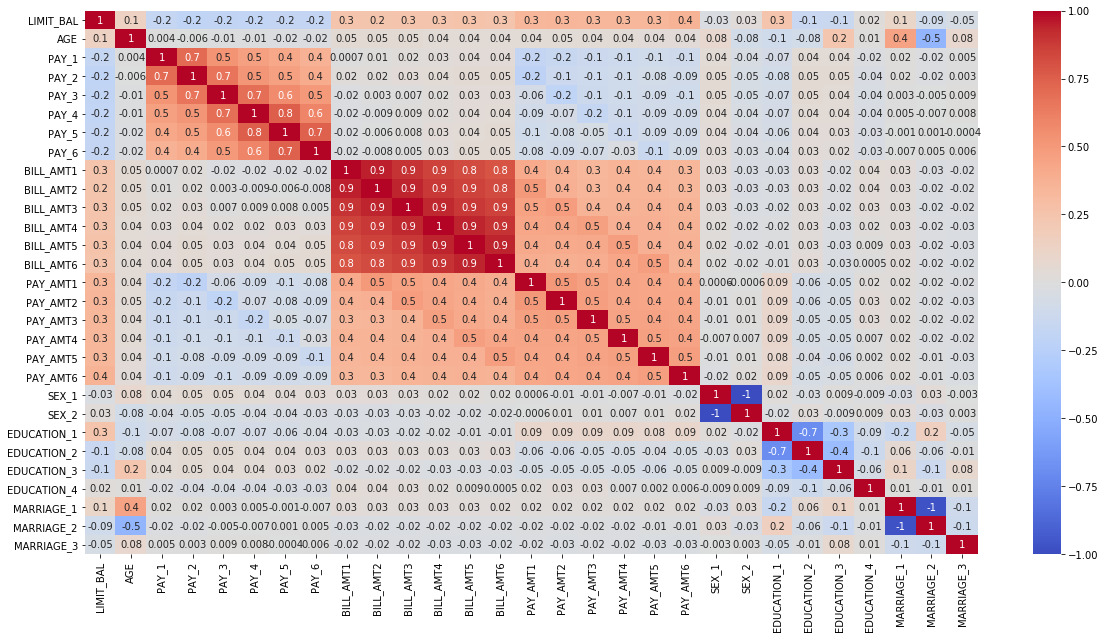

In [29]:
#--------------------------------------------------------------
#1. Correlation check
#--------------------------------------------------------------

#1 Pearson Corelation matrix
    # PAY_X and BILL_AMTX showing high correlation with each other
    # BILL_AMT1 to BILL_AMT6 show high correlation amongst each other
    # PAY_X and BILL_AMTX are positively correlated with Limit balance while Payment statuses PAY_X are negatively correlated

plt.figure(figsize=(20,10))
sns.heatmap(x_train_outfix.corr(),annot=True, fmt='.1g',center= 0,cmap= 'coolwarm')

In [30]:
#2 Brute force approach

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(x_train_outfix, 0.8)
print('Number of correlated featues are: {}'.format(set(corr_features)))

Number of correlated featues are: {'BILL_AMT6', 'BILL_AMT2', 'BILL_AMT5', 'BILL_AMT3', 'SEX_2', 'MARRIAGE_2', 'BILL_AMT4'}


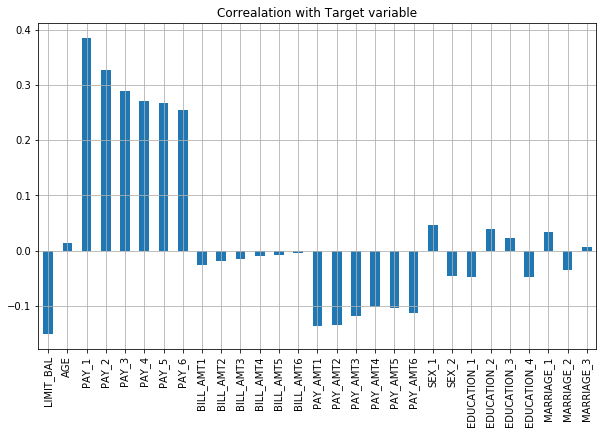

In [40]:
#3 Correlation with response Variable

x_train_outfix.corrwith(y_train).plot.bar(figsize=(10,6), title="Correlation with Target variable", fontsize=10,rot=90,grid=True)

In [46]:
#--------------------------------------------------------------
#2. Multicollinearity check
#--------------------------------------------------------------

#1 Multicollinearity using VIF - 
    # BILL_AMTX shows very high VIF
    # An infinite VIF value indicates that the corresponding variables are expressed exactly by a linear combination 
    # of other variables. This is especially for encoded categorical variables

def vif_scores(df):
    VIF = pd.DataFrame()
    VIF["Independent Features"] = df.columns
    VIF["VIF Score"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF

In [56]:
vif_scores(x_train_outfix)

,Independent Features,VIF Score
0,LIMIT_BAL,1.47
1,AGE,1.38
2,PAY_1,2.08
3,PAY_2,2.79
4,PAY_3,2.84
5,PAY_4,3.25
6,PAY_5,3.52
7,PAY_6,2.41
8,BILL_AMT1,11.06
9,BILL_AMT2,20.36


In [58]:
# Saving processed file in csv format for part 4 - Data Balancing

x_train_outfix.to_csv("x_train_outfix.csv", index=None)
x_test_outfix.to_csv("x_test_outfix.csv", index=None)

y_train.to_csv("y_train_c3.csv", index=None)
y_test.to_csv("y_test_c3.csv", index=None)